In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/gregorio/TCC-CD-USP/archives/df_model.csv')
df.head()

,companycode,ano,amortization,ativos_circulantes,caixa_e_equivalentes_de_caixa,contas_a_receber,cogs,despesas_financeiras,dívidas_financeiras,estoques,...,cobertura_de_juros,lucros_retidos_sobre_ativos,razao_posicao_cambial,crescimento_vendas,crescimento_ativos,crescimento_lucro_liquido,margem_ebitda,ebitda_sobre_juros,ebitda_sobre_divida,total_score
0,ADEL,2008,21570757.0,45582654.0,12278966.0,1732209.5,-36969117.0,-4467984.0,1732469.5,13475416.0,...,-4.416966,0.189012,-0.032546,0.000000,0.000000,0.000000,1.061270,-17.764184,45.813269,7.25
1,ADEL,2009,21570757.0,45582654.0,12278966.0,1732209.5,-36969117.0,-4467984.0,1732469.5,13475416.0,...,-4.416966,0.189012,-0.032546,0.000000,0.000000,0.000000,1.061270,-17.764184,45.813269,7.25
2,ADEL,2010,21570757.0,58621451.0,23356948.0,2596836.0,-45050840.0,-2562968.0,1451071.5,12923503.0,...,-9.050283,0.250811,-0.027382,0.173849,0.202340,0.210271,0.904094,-30.968039,54.697575,8.15
3,ADEL,2011,21570757.0,75550839.0,32365348.0,4467178.5,-56331016.0,-2482437.0,1881790.0,13891455.5,...,-12.144509,0.294988,0.034318,0.268765,0.246222,0.309325,0.712578,-31.972651,42.177975,8.30
4,ADEL,2012,21570757.0,93484162.0,9840553.0,8249453.0,-68996586.0,-4188750.0,2152682.5,27333673.5,...,-8.900462,0.341168,0.020738,0.222102,0.223090,0.194568,0.583076,-18.948396,36.870320,8.30


In [2]:
df.isnull().sum()

companycode                           0
ano                                   0
amortization                          0
ativos_circulantes                    0
caixa_e_equivalentes_de_caixa         0
contas_a_receber                      0
cogs                                  0
despesas_financeiras                  0
dívidas_financeiras                   0
estoques                              0
ebit                                  0
ebitda                                0
lucro_prejuízo_líquido_do_período     0
lucro_prejuízo_operacional_líquido    0
lucros_prejuízos_acumulados           0
outros_ativos_circulantes             0
passivos_circulantes                  0
patrimônio_líquido                    0
posição_cambial_líquida               0
receita_de_vendas                     0
total_de_ativos                       0
ebitda.1                              0
liquidez_corrente                     0
liquidez_seca                         0
divida_sobre_pl                       0


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [4]:
# Features and target
X = df.drop(columns=['total_score','companycode','ano'])
y = df['total_score']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Build pipeline + Linear Regression
pipeline = Pipeline([
    ('regressor', LinearRegression())
])

In [7]:
# Fit model
pipeline.fit(X_train, y_train)

,steps,"[('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# Predictions
y_pred = pipeline.predict(X_test)

In [9]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [10]:
# Results summary
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R²': r2
}

In [11]:
# Display results
metrics_df = pd.DataFrame([metrics])

In [12]:
metrics_df

,MAE,MSE,RMSE,MAPE,R²
0,0.893626,2.359021,1.53591,19.410933,-0.348405


In [13]:
# Residuals
residuals = y_test - y_pred

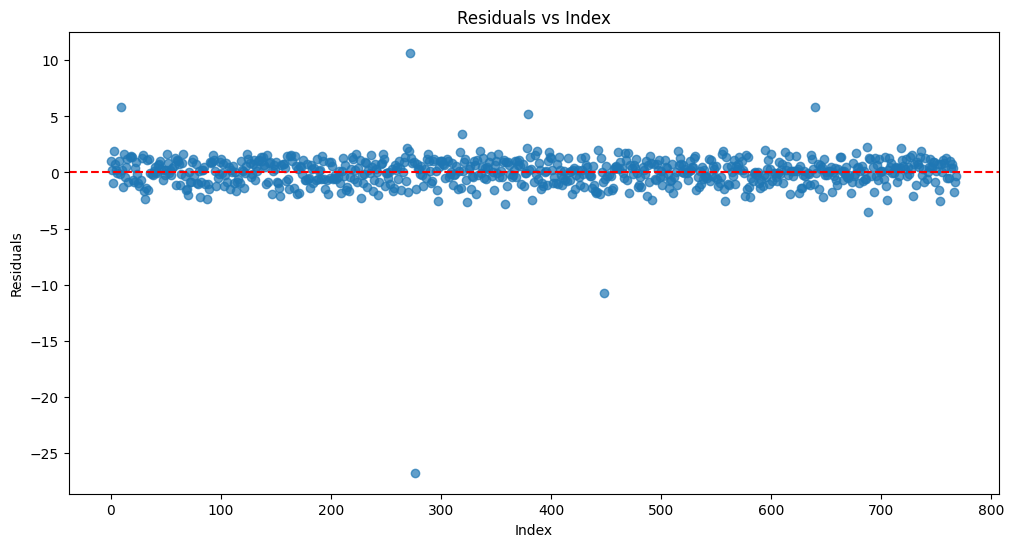

In [14]:


# Plot residuals vs index
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Index')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()


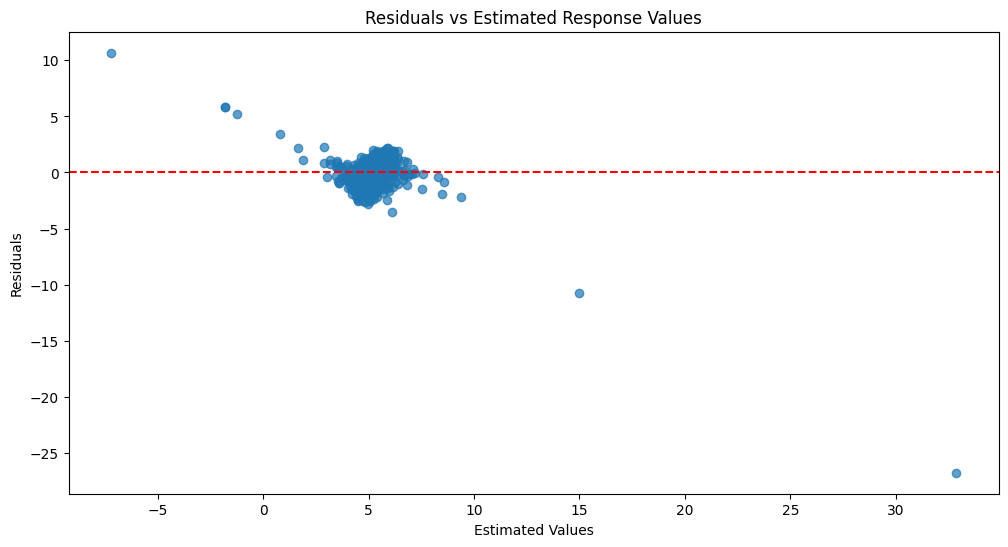

In [15]:

# Residuals vs estimated response values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Estimated Response Values')
plt.xlabel('Estimated Values')
plt.ylabel('Residuals')
plt.show()




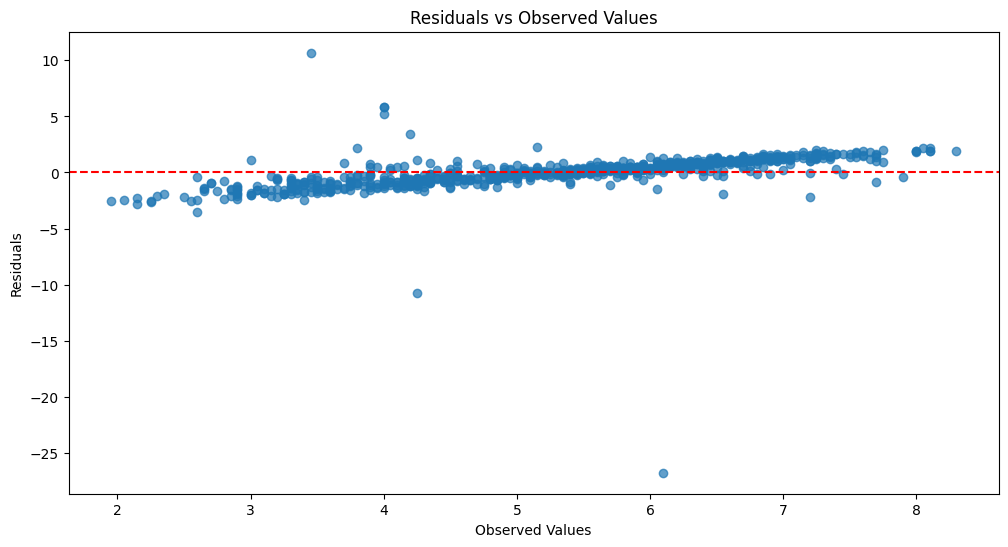

In [16]:
# Residuals vs observations (actual values)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Observed Values')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.show()



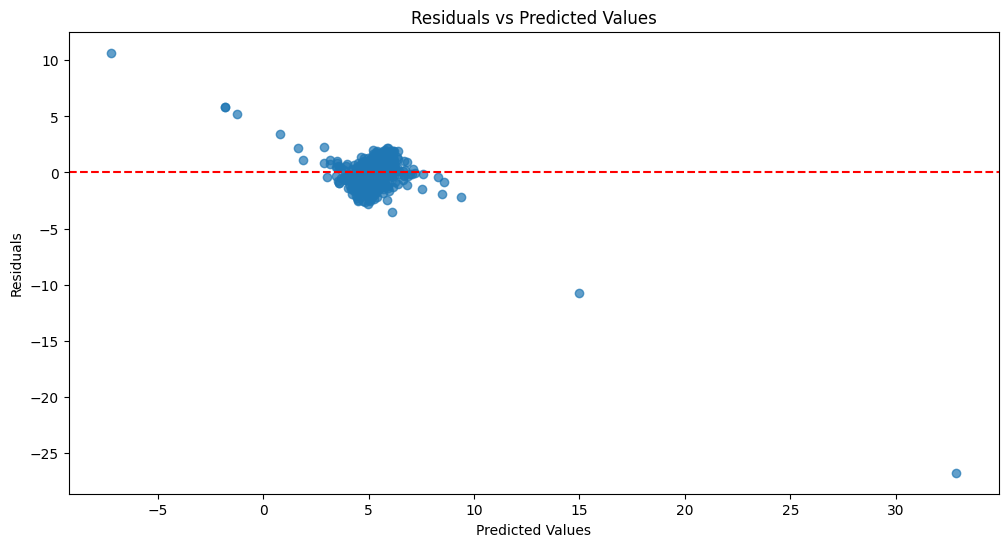

In [17]:
# Residuals vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()